In [1]:
from util import *

import pandas as pd
import numpy as np 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from xgboost import plot_importance

In [2]:
df = pd.read_csv('preprocess_data.csv')
df

,title,year,rating,director_name,genre,cast_names,cast_ids,votes,director_ids,country,day,month
0,Miss Jerry,1894,5.9,['Alexander Black'],"['Short', 'Romance']","[['Blanche Bayliss', 'William Courtenay', 'Cha...","[['0063086', '0183823', '1309758']]",191.0,[[85156]],USA,0,Oct
1,The Story of the Kelly Gang,1906,6.1,['Charles Tait'],"['Action', 'Adventure', 'Biography', 'Crime', ...","[['Elizabeth Tait', 'John Tait', 'Nicholas Bri...","[['0846887', '0846894', '1431224', '3002376', ...",737.0,[[846879]],Australia,26,Dec
2,Den sorte drøm,1911,5.9,['Urban Gad'],['Drama'],"[['Asta Nielsen', 'Valdemar Psilander', 'Gunna...","[['0003425', '0699637', '0375839', '0016799', ...",218.0,[[300487]],Germany,19,Aug
3,Cleopatra,1963,7.0,['Joseph L. Mankiewicz'],"['Biography', 'Drama', 'History', 'Romance']","[['Elizabeth Taylor', 'Richard Burton', 'Rex H...","[['0000072', '0000009', '0001322', '0114386', ...",31526.0,[[581]],Canada,31,Jul
4,Torment,1994,7.1,['Claude Chabrol'],"['Crime', 'Drama', 'Thriller']","[['Emmanuelle Béart', 'François Cluzet', 'Nath...","[['0000322', '0167388', '0136597', '0932870', ...",4936.0,[[1031]],France,16,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...
84974,A Second Chance: Rivals!,2019,4.8,['Clay Glen'],"['Drama', 'Family', 'Sport']","[['Emily Morris', 'Stella Shute', 'Carmel John...","[['4825006', '10195787', '0424718', '1138590',...",338.0,[[4825581]],Australia,24,Sep
84975,Feed,2017,6.2,['Tommy Bertelsen'],['Drama'],"[['Troian Bellisario', 'Tom Felton', 'Ben Winc...","[['0069079', '0271657', '3656718', '0001664', ...",2445.0,[[77879]],USA,18,Jul
84976,Capernaum,2018,8.4,['Nadine Labaki'],['Drama'],"[['Zain Al Rafeea', 'Yordanos Shiferaw', 'Bolu...","[['9862858', '9862859', '9862860', '10201625',...",78256.0,[[1701024]],Other,20,Sep
84977,G-Loc,2020,4.6,['Tom Paton'],['Sci-Fi'],"[['Stephen Moyer', 'Tala Gouveia', 'John Rhys-...","[['0610459', '4823334', '0722636', '7478548', ...",1597.0,[[7441188]],USA,11,Aug


# Feature Engineering


In [3]:
# age là tuổi của phim được cho đến năm hiện tại (2021)
df['age'] = 2021 - df['year']
df['age']

0        127
1        115
2        110
3         58
4         27
        ... 
84974      2
84975      4
84976      3
84977      1
84978      2
Name: age, Length: 84979, dtype: int64

In [4]:
# tách 1 chuỗi string thành mảng các string chứa thông tin
df['cast_names'] = df['cast_names'].apply(split_text)
df['cast_ids'] = df['cast_ids'].apply(split_text)
df['director_name'] = df['director_name'].apply(split_text)
df['director_ids'] = df['director_ids'].apply(split_text)


In [5]:
#number cast là số lượng thành viên đoàn cast
df['number_cast'] = df['cast_names'].apply(lambda s: len(s))
df['number_cast']

0          3
1         17
2         11
3         85
4         27
        ... 
84974     22
84975     21
84976    115
84977     10
84978     28
Name: number_cast, Length: 84979, dtype: int64

In [6]:
le = preprocessing.LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['country'] 

0        37
1         1
2        10
3         5
4         9
         ..
84974     1
84975    37
84976    24
84977    37
84978    23
Name: country, Length: 84979, dtype: int64

In [7]:
df['month'] = le.fit_transform(df['month'])
df['month']

0        10
1         2
2         1
3         5
4         3
         ..
84974    11
84975     5
84976    11
84977     1
84978     9
Name: month, Length: 84979, dtype: int64

In [8]:
df['day'] = df['day'].astype(int)

In [9]:
le = preprocessing.LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['month'] = le.fit_transform(df['month'])
df['votes'] = df['votes'].fillna('0').astype(int)

In [10]:
X = df.drop(['rating'], axis = 1)
y = df['rating']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 1)

In [12]:
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [13]:
# xây dựng dict chứa thông tin về điểm trung bình của đạo diễn và các diễn viên
cast_score_board = getScoreBroad(X_train['cast_ids'], y_train)
director_score_board = getScoreBroad(X_train['director_ids'], y_train)

Xây dựng dict bằng tập train và sau đó mapping sang tập test

In [14]:
for i in X_train.index:
    s = df['cast_ids'][i]
    me, ma, mi = getScore(s, cast_score_board)
    X_train.loc[i,'cast_mean_score'] = me
    X_train.loc[i,'cast_max_score'] = ma
    X_train.loc[i,'cast_min_score'] = mi
    
    s = df['director_ids'][i]
    me, ma, mi = getScore(s, director_score_board)
    X_train.loc[i,'director_mean_score'] = me
    X_train.loc[i,'director_max_score'] = ma
    X_train.loc[i,'director_min_score'] = mi

    
for i in X_test.index:
    s = df['cast_ids'][i]
    me, ma, mi = getScore(s, cast_score_board)
    X_test.loc[i,'cast_mean_score'] = me
    X_test.loc[i,'cast_max_score'] = ma
    X_test.loc[i,'cast_min_score'] = mi
    
    s = df['director_ids'][i]
    me, ma, mi = getScore(s, director_score_board)
    X_test.loc[i,'director_mean_score'] = me
    X_test.loc[i,'director_max_score'] = ma
    X_test.loc[i,'director_min_score'] = mi

# Visualize 


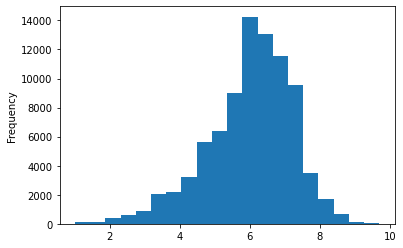

In [15]:
df.rating.plot.hist(bins = 20);

phân bố của rating tập trung chủ yếu ở 6 đến 7 điểm 

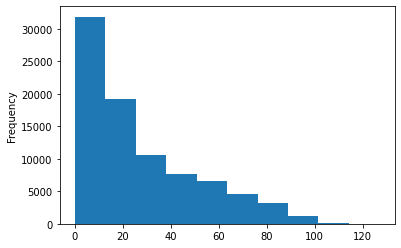

In [16]:
df.age.plot.hist();

Số lượng phim tập trung vào 20 năm đổ lại

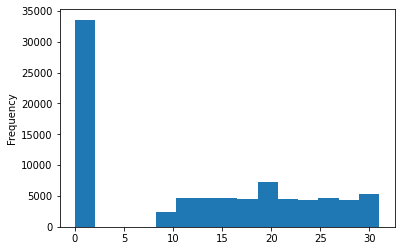

In [17]:
df.day.plot.hist(bins = 15);

Phim chủ yếu được release vào cuối tháng, tập trung chủ yếu vào ngày 19 đến 20

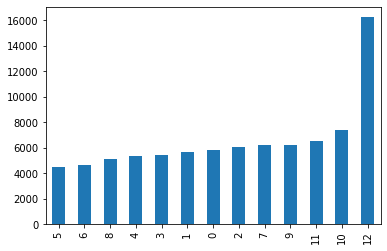

In [18]:
df.month.value_counts().sort_values().plot.bar(); 

Phim được phát hành tập trung vào các tháng đầu và cuối năm

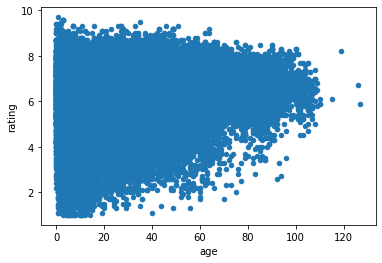

In [19]:
df.plot.scatter(x='age', y='rating');

Có thể dễ dàng thấy được số lượng phim có tuổi đời lớn hơn 70 có rating cao hơn và số lượng ít hơn.

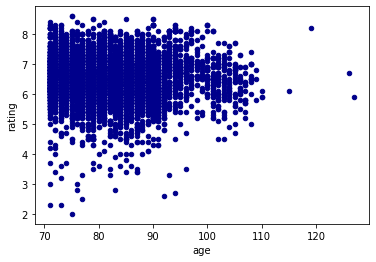

In [20]:
case = df[df['age']>70]
case.plot.scatter(x='age', y='rating', c='DarkBlue');

In [21]:
print('Rating trung bình của các bộ phim có tuổi đời lớn hơn 70:',round(case.rating.mean(),3))
print('Rating trung bình của tất cả phim:',round(df.rating.mean(),3))

Rating trung bình của các bộ phim có tuổi đời lớn hơn 70: 6.496
Rating trung bình của tất cả phim: 5.999


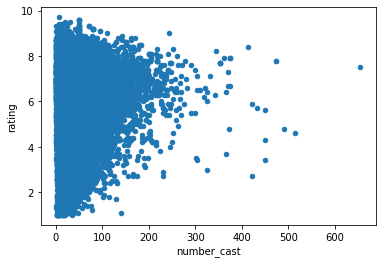

In [22]:
df.plot.scatter(x= 'number_cast', y='rating');

Với number cast lớn thì phim có xu hướng điểm cao hơn

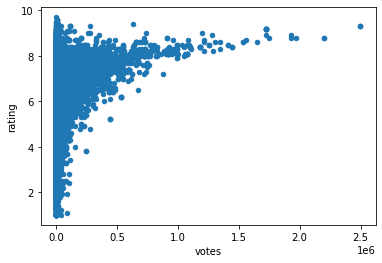

In [23]:
df.plot.scatter(x= 'votes', y='rating');

Số vote càng cao thì tỉ lệ rate càng cao

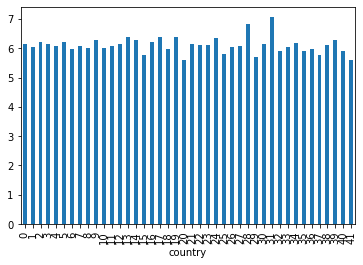

In [24]:
df.groupby('country').rating.mean().plot.bar();

Rating trung bình phim của các nước không cách biệt nhau quá nhiều

# Train Model


In [25]:
select_feature = ['votes', 'country', 'number_cast', 'age', 'cast_mean_score',
                  'director_mean_score', 'month',]

In [26]:
X_train = X_train[select_feature]
X_test = X_test[select_feature]

evalset = [(X_train, y_train), (X_test,y_test)]

In [27]:
model = XGBRegressor(n_estimators = 500,
                     max_depth=3);
model.fit(X_train,y_train, eval_metric='rmse', eval_set=evalset);

[0]	validation_0-rmse:4.02166	validation_1-rmse:4.02160
[1]	validation_0-rmse:2.92373	validation_1-rmse:2.92548
[2]	validation_0-rmse:2.19166	validation_1-rmse:2.19479
[3]	validation_0-rmse:1.71955	validation_1-rmse:1.72555
[4]	validation_0-rmse:1.43081	validation_1-rmse:1.43992
[5]	validation_0-rmse:1.26353	validation_1-rmse:1.27507
[6]	validation_0-rmse:1.17155	validation_1-rmse:1.18447
[7]	validation_0-rmse:1.12203	validation_1-rmse:1.13553
[8]	validation_0-rmse:1.09633	validation_1-rmse:1.11053
[9]	validation_0-rmse:1.07994	validation_1-rmse:1.09497
[10]	validation_0-rmse:1.07200	validation_1-rmse:1.08711
[11]	validation_0-rmse:1.06732	validation_1-rmse:1.08306
[12]	validation_0-rmse:1.06286	validation_1-rmse:1.07917
[13]	validation_0-rmse:1.06055	validation_1-rmse:1.07714
[14]	validation_0-rmse:1.05896	validation_1-rmse:1.07587
[15]	validation_0-rmse:1.05598	validation_1-rmse:1.07278
[16]	validation_0-rmse:1.05451	validation_1-rmse:1.07162
[17]	validation_0-rmse:1.05361	validation

[144]	validation_0-rmse:1.01172	validation_1-rmse:1.04196
[145]	validation_0-rmse:1.01167	validation_1-rmse:1.04193
[146]	validation_0-rmse:1.01162	validation_1-rmse:1.04192
[147]	validation_0-rmse:1.01153	validation_1-rmse:1.04188
[148]	validation_0-rmse:1.01143	validation_1-rmse:1.04174
[149]	validation_0-rmse:1.01132	validation_1-rmse:1.04167
[150]	validation_0-rmse:1.01125	validation_1-rmse:1.04171
[151]	validation_0-rmse:1.01112	validation_1-rmse:1.04171
[152]	validation_0-rmse:1.01103	validation_1-rmse:1.04185
[153]	validation_0-rmse:1.01092	validation_1-rmse:1.04182
[154]	validation_0-rmse:1.01080	validation_1-rmse:1.04184
[155]	validation_0-rmse:1.01067	validation_1-rmse:1.04184
[156]	validation_0-rmse:1.01054	validation_1-rmse:1.04182
[157]	validation_0-rmse:1.01043	validation_1-rmse:1.04182
[158]	validation_0-rmse:1.01034	validation_1-rmse:1.04184
[159]	validation_0-rmse:1.01024	validation_1-rmse:1.04185
[160]	validation_0-rmse:1.01014	validation_1-rmse:1.04185
[161]	validati

[286]	validation_0-rmse:0.99596	validation_1-rmse:1.03944
[287]	validation_0-rmse:0.99585	validation_1-rmse:1.03950
[288]	validation_0-rmse:0.99567	validation_1-rmse:1.03948
[289]	validation_0-rmse:0.99552	validation_1-rmse:1.03956
[290]	validation_0-rmse:0.99539	validation_1-rmse:1.03946
[291]	validation_0-rmse:0.99528	validation_1-rmse:1.03940
[292]	validation_0-rmse:0.99521	validation_1-rmse:1.03937
[293]	validation_0-rmse:0.99511	validation_1-rmse:1.03941
[294]	validation_0-rmse:0.99503	validation_1-rmse:1.03940
[295]	validation_0-rmse:0.99493	validation_1-rmse:1.03942
[296]	validation_0-rmse:0.99487	validation_1-rmse:1.03938
[297]	validation_0-rmse:0.99478	validation_1-rmse:1.03941
[298]	validation_0-rmse:0.99472	validation_1-rmse:1.03938
[299]	validation_0-rmse:0.99471	validation_1-rmse:1.03937
[300]	validation_0-rmse:0.99465	validation_1-rmse:1.03938
[301]	validation_0-rmse:0.99461	validation_1-rmse:1.03935
[302]	validation_0-rmse:0.99457	validation_1-rmse:1.03937
[303]	validati

[428]	validation_0-rmse:0.98350	validation_1-rmse:1.03934
[429]	validation_0-rmse:0.98341	validation_1-rmse:1.03939
[430]	validation_0-rmse:0.98337	validation_1-rmse:1.03936
[431]	validation_0-rmse:0.98327	validation_1-rmse:1.03933
[432]	validation_0-rmse:0.98317	validation_1-rmse:1.03937
[433]	validation_0-rmse:0.98307	validation_1-rmse:1.03929
[434]	validation_0-rmse:0.98298	validation_1-rmse:1.03925
[435]	validation_0-rmse:0.98288	validation_1-rmse:1.03925
[436]	validation_0-rmse:0.98283	validation_1-rmse:1.03925
[437]	validation_0-rmse:0.98277	validation_1-rmse:1.03922
[438]	validation_0-rmse:0.98267	validation_1-rmse:1.03923
[439]	validation_0-rmse:0.98264	validation_1-rmse:1.03922
[440]	validation_0-rmse:0.98259	validation_1-rmse:1.03921
[441]	validation_0-rmse:0.98249	validation_1-rmse:1.03922
[442]	validation_0-rmse:0.98245	validation_1-rmse:1.03915
[443]	validation_0-rmse:0.98224	validation_1-rmse:1.03872
[444]	validation_0-rmse:0.98216	validation_1-rmse:1.03881
[445]	validati

# Evaluation


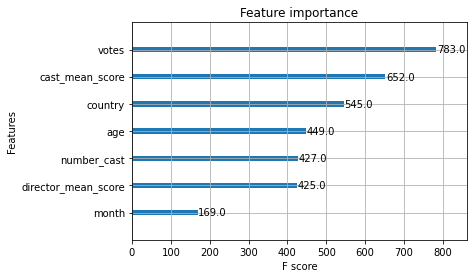

In [28]:
plot_importance(model)
pyplot.show()

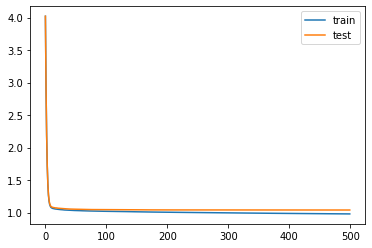

In [29]:
results = model.evals_result()
pyplot.plot(results['validation_0']['rmse'], label='train')
pyplot.plot(results['validation_1']['rmse'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()